In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivpoojansingh123","key":"c7d55648ac917d161a350996494d3a1a"}'}

In [ ]:
! pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset")

Dataset URL: https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset


100%|██████████| 242M/242M [00:00<00:00, 455MB/s]


In [ ]:
import os
import shutil
import random
import tensorflow as tf

# Step 1: Set dataset paths
source_dir = "/content/5-flower-types-classification-dataset/flower_images"
base_dir = "/content/split_flowers"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Step 2: Create train/test folders
for split_dir in [train_dir, test_dir]:
    os.makedirs(split_dir, exist_ok=True)

# Step 3: Split into train and test (80/20)
split_ratio = 0.8

for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    images = os.listdir(class_path)
    random.shuffle(images)

    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    test_images = images[split_index:]

    for image in train_images:
        src = os.path.join(class_path, image)
        dst = os.path.join(train_dir, class_name, image)
        shutil.copy2(src, dst)

    for image in test_images:
        src = os.path.join(class_path, image)
        dst = os.path.join(test_dir, class_name, image)
        shutil.copy2(src, dst)

print("✅ Dataset split done!")

# Step 4: Remove invalid hidden folders like .DS_Store or __MACOSX
for split in ["train", "test"]:
    folder_path = os.path.join(base_dir, split)
    for class_folder in os.listdir(folder_path):
        full_path = os.path.join(folder_path, class_folder)
        if not os.path.isdir(full_path):
            continue
        # Check if folder name is not one of the 5 expected classes
        if class_folder not in ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']:
            print(f"🗑️ Removing unexpected folder: {full_path}")
            shutil.rmtree(full_path)


✅ Dataset split done!


In [ ]:
# Step 5: Load into TensorFlow datasets
img_size = (224, 224)
batch_size = 32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size
)

# Optional: Normalize and prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.map(lambda x, y: (x / 255.0, y)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.map(lambda x, y: (x / 255.0, y)).cache().prefetch(buffer_size=AUTOTUNE)


Found 3999 files belonging to 5 classes.
Found 1000 files belonging to 5 classes.


In [ ]:
import os

train_dir = "/content/split_flowers/train"  # or wherever your train set is

print("Detected class folders:")
print(os.listdir(train_dir))

Detected class folders:
['Lotus', 'Orchid', 'Sunflower', 'Tulip', 'Lilly']


In [ ]:
from tensorflow.keras import layers, models

# Define a simple CNN model
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # 5 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10
)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 123ms/step - accuracy: 0.3578 - loss: 1.4817 - val_accuracy: 0.5300 - val_loss: 1.1487
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.5581 - loss: 1.1277 - val_accuracy: 0.6420 - val_loss: 1.0071
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.6291 - loss: 0.9635 - val_accuracy: 0.6850 - val_loss: 0.8635
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.7184 - loss: 0.7451 - val_accuracy: 0.7100 - val_loss: 0.7729
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.8103 - loss: 0.5382 - val_accuracy: 0.7940 - val_loss: 0.6273
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.8655 - loss: 0.3868 - val_accuracy: 0.8370 - val_loss: 0.5933
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9070 - loss: 0.2656 - val_accuracy: 0.8320 - val_loss: 0.5860
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9280 - loss: 0.2036 - val

In [ ]:
model.evaluate(test_dataset)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8705 - loss: 0.5062


[0.5446401238441467, 0.8619999885559082]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

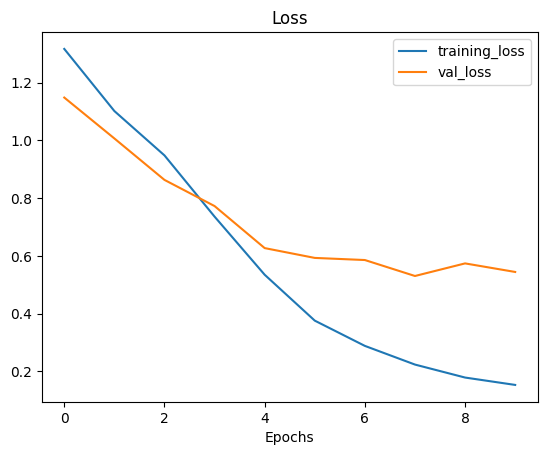

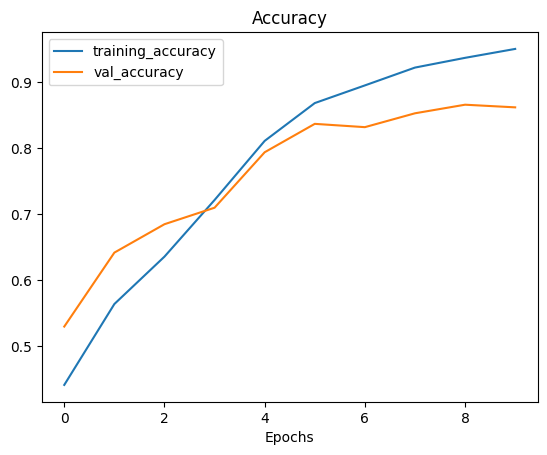

In [ ]:
plot_loss_curves(history)

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Lilly' 'Lotus' 'Orchid' 'Sunflower' 'Tulip']


In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


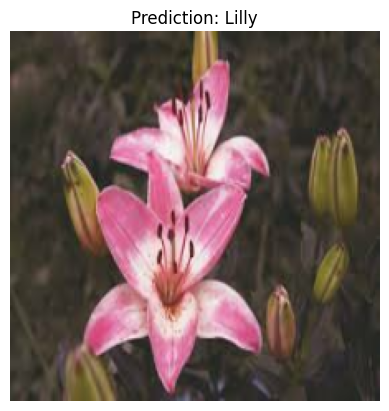

In [ ]:
pred_and_plot(model, "/content/5-flower-types-classification-dataset/flower_images/Lilly/00048a5c76.jpg", class_names)

In [ ]:
model.save("flower_classification_model.h5")